# Нейронные сети

Начнем с создания класса описывающего нейронную сеть, который должен содержать по крайней мере три функции:

* Инициализация - задание входных, скрытых и выходных узлов;
* Тренировка - Уточнение весовых коэффициентов в процессе обработки предоставленных тренировочных данных
* Опрос - получение значений сигналов с выходных узлов после предоставления входящих данных.

        # определение класса нейронный сети
        class NeuralNetwork:
            # инициализация нейросети
            def __init__():
                pass
            # Обучание нейросети
            def train():
                pass
            # Опрос нейросети
            def query():
                pass


## Инициализация сети
Необходимо задать количество узлов входного, скрытого и выходного слоев. Эти даные определяют конфигурацию и размер нейронной сети. Кроме того нам нужно установть кооэфициент обучения.

> В Метод __init__() добавьте добавьте инициализацию параметров:
>
> `inodes, hnodes, onodes, lr`


In [ ]:
# определение класса нейронный сети
import numpy as np
import scipy.special
class NeuralNetwork:

    # инициализация нейросети
    def __init__(self, inodes, hnodes, onodes, lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        self.lr = lr
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
    # Обучание нейросети
    def train(self, inputs_list, targets_list):
      inputs = np.array(inputs_list, ndmin=2).T
      targets = np.array(targets_list, ndmin=2).T
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)
      output_errors = targets - final_outputs
      hidden_errors = np.dot(self.who.T, output_errors)
      self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
      self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    # Опрос нейросети
    def query(self, inputs_list):
      inputs = np.array(inputs_list, ndmin=2).T
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)
      return final_outputs

Попробуем создать объект небольшой сети с тремя узлами в каждом слое и коэффициентом обучения равным 0.3

In [ ]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3

n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

## Весовые коэффициенты

Они используются для расчета распространения сигналов в прямом направлении, а также обратного распространения ошибок, и именно весовые коэффициенты уточняются в попытке улучшить характеристики сети.

> Добавьте матрицы весовых коэффициентов связей wih (между входным и скрытым слоями) и who (между скрытым и выходным слоями) в блок инициализации

        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

Весовые коэффициенты выбраны случайно из нормального распределения с центром в нуле и со стандартным отклонением.

## Опрос сети

Метод query() принимает в качестве аргумента входные данные нейросети и возвращает ее выходные данные.

Для этого нам нужно передавать сигналы от узлов входного слоя через скрыты слой к узлам выходного слоя для получения выходных данных. При этом по мере прохождения сигнала мы должны корректировать их с помощью весовых коэфиициентов

> $X_{скрытый} = W_{входной-скрытый} * I$

а также применять сигмоиду для получения выходных сигналов слоев.
> $σ(x) = 1/(1+e^{-x})$

Для применения сигмоиды, будем использовать функцию `expit()` из библиотеки `scipy`
        
        import scipy.special

Ниже приведен код, определяющий функцию активации, который необходимо поместить в блок __init__
        
        self.activation_function = lambda x: scipy.special.expit(x)

Это анонимная  функция и чтобы использовать её нужно будет вызвать как:
        
        self.activation_function(x)


### Опишем код для метода `query(self, inputs_list)`.
Преобразуем список входных значений в двумерный массив:

        inputs = np.array(inputs_list, ndmin=2).T

Расчитаем входящие сигналы для скрытого слоя:

        hidden_inputs = np.dot(self.wih, inputs)

Расчитаем исходящие сигналы для скрытого слоя с помощью фунции активации:

        hidden_outputs = self.activation_function(hidden_inputs)

Расчитаем входящие сигналы выходного слоя:

        final_inputs = np.dot(self.who, hidden_outputs)

Расчитаем исходящие сигналы для выходного слоя с помощью фунции активации:

        final_outputs = self.activation_function(final_inputs)

и вернем результат.

### Проверим функцию опроса
Для этого создадим необольшую сеть и предоставим ей входные данные:
        # количество входных, скрытых и выходных узлов
        input_nodes = 3
        hidden_nodes = 3
        output_nodes = 3
        # коээфициент обучения
        learning_rate = 0.3
        # создадим экземпляр нейронной сети
        n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
        # и выведем результат:
        n.query([1.0, 0.5, -1.5])

если в результате не получили ошибок и вывелся массив, то скорее всего всё написано правильно.

In [ ]:
# количество входных, скрытых и выходных узлов
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
# коээфициент обучения
learning_rate = 0.3
l = [1.0, 0,5, -1.5]
# создадим экземпляр нейронной сети
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)
# и выведем результат:
n.query([1.0, 0.5, -1.5])

array([[0.49342857],
       [0.56180834],
       [0.3615709 ]])

# Тренировка сети
Для начала запишем в метод `train(self, inputs_list, targets_list)` похожий код, как и у функции опроса, но тут у нас появился еще дополнительный параметр `targets_list` который подразумевает наличие данных с правильными ответами для тренировки.

И так, нам необходимо:

1) Преобразуем список входных значений в двумерный массив:

        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

2) Расчитать входящие сигналы для скрытого слоя:

        hidden_inputs = np.dot(self.wih, inputs)

3) Расчитаем исходящие сигналы для скрытого слоя с помощью фунции активации:

        hidden_outputs = self.activation_function(hidden_inputs)

4) Расчитать входящие сигналы выходного слоя:

        final_inputs = np.dot(self.who, hidden_outputs)

5) Расчитать исходящие сигналы для выходного слоя с помощью фунции активации:

        final_outputs = self.activation_function(final_inputs)

На первом этапе, список `target_list` преобразуется в массив точно также, как список `input_list`

### Почти готово
Но сейчас наш метод еще не умеет обучаться. Для этого нужно посчитать ошибку и скоректировать веса.



И так! Посчитаем ошибку:
        # ошибка = целевое значение - фактическое
        output_errors = targets - final_outputs

Это нужно добавить в метод `train()`, если вдруг не догадались.

Далее нужно расчитать обратное распространение ошибок для узлов скрытого слоя:

> $ошибки_{скрытый} = веса^{T}_{скрытый-выходной} * ошибки_{выходной}$

а вот и код который это реализует:
        
        hidden_errors = np.dot(self.who.T, output_errors)

Пора перейти к обновлению весов, которые вычисляютя по следующей формуле:

$ΔW_{jk} = α * E_{k}*Сигмоида(O_{k}) * (1 - Сигмоида(O_{k})) · O^{T}_{j}$

нам же нужно сделать следующее:
        
1) Обновим весовые коэффициенты связей между скрытым слоем и выходным слоем:

        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))

2) Обновим весовые коэффициенты связей между входным и скрытым слоями:
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

## Вот и всё, осталось проверить.

В вас должнен получиться примерно такая структура:

        import numpy as np
        import scipy.special
        import matplotlib.pyplot
        %matplotlib inline

        class NeuralNetwork:

            def __init__(self, inputnodes, hiddennodes, outputnoded, learningrate):
               
                # -----Ваш код-----


            def train(self, inputs_list, targets_list):
                
                # -----Ваш код-----

            def query(self, inputs_list):
                
                # -----Ваш код-----
                return final_outputs



# Набор рукописных цифр MNIST

Это коллекция изображений рукописных цифр, используемых исследователями искусственного интеллекта в качестве популярного набора для тестирования идей и алгоритмов.

Базу даных MNIST в удобном формате можно скачать на сайте:
https://pjreddie.com/projects/mnist-in-csv/

Там находиться тренировачный (60 000) и тестовый (10 000) экземпляров.
данные представляют из себя:
* Первое значение - это маркер, т.е. правильный ответ, который должна определять нейросеть.
* последующие значения - это значения пикселей рукописной цифры размерностью 28х28 или 784 пикселя.

Мы же будем использовать меньший набор для тренировки - 100 записей и 10 записей для теста.

In [ ]:
data_file = open('/content/mnist_train_100.csv')
data_list = data_file.readlines()
data_file.close()

Проверим что количество элемнтов равно 100

In [ ]:
len(data_list)

100

И посмотрим как выглядит первая строка

In [ ]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Если внимательно посмотреть, то можно заметить что цифры не выходят за предели диапазона 0 - 255.

Чтобы визуализировать эти цифры нам нужно преобразовать в массив 28х28, пропустив первый символ потому что это маркер для обучения или теста

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

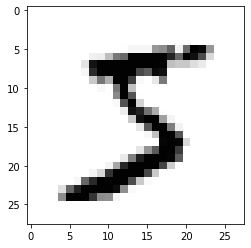

In [ ]:
all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys')

Все строки кода вам должны быть понятны.
Функция np.asfarray() - Преобразует строки в числа, т.к. мы берем данные из текстового документа, и до её использования у нас массив из символов ("2" -> 2).

## Подготовка данных
для начала нам нужно масштабировать данные из цветового диапазоно 0-255 в диапазон 0.01 до 1.0.

Ноль мы не можем брать посколько возможна блокировака обновления весов. Нам необязательно выбирать 0.99 в качестве верхней границы для входных сигналов. Лишь выходные сигналы не могут превышать 1.0

In [ ]:
scaled_input = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

Теперь мы можем скармливать эти значения в нашу нейросеть, только нужно создать массив выходных значений которые мы хотим получить для обучения.

In [ ]:
# задаем количество выходных значений. Цифр 10. значит 10
onodes = 10
# создаем массив и добавлям к каждому элементу 0.01, чтобы избавиться от нулей
targets = np.zeros(onodes) + 0.01
# для нашего маркера зададим значение 0.99
targets[int(all_values[0])] = 0.99

In [ ]:
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.99, 0.01, 0.01, 0.01, 0.01])

> Посмотрите как выклядят выходные значения

# Теперь всё готово для запуска

In [ ]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# определение класса нейронный сети
import numpy as np
import scipy.special
class NeuralNetwork:

    # инициализация нейросети
    def __init__(self, inodes, hnodes, onodes, lr):
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes
        self.lr = lr
        self.wih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        self.activation_function = lambda x: scipy.special.expit(x)
    # Обучание нейросети
    def train(self, inputs_list, targets_list):
      inputs = np.array(inputs_list, ndmin=2).T
      targets = np.array(targets_list, ndmin=2).T
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)
      output_errors = targets - final_outputs
      hidden_errors = np.dot(self.who.T, output_errors)
      self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
      self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))

    # Опрос нейросети
    def query(self, inputs_list):
      inputs = np.array(inputs_list, ndmin=2).T
      hidden_inputs = np.dot(self.wih, inputs)
      hidden_outputs = self.activation_function(hidden_inputs)
      final_inputs = np.dot(self.who, hidden_outputs)
      final_outputs = self.activation_function(final_inputs)
      return final_outputs

## Инициализируем нашу сеть

In [ ]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.7
n = NeuralNetwork(input_nodes,hidden_nodes,output_nodes,learning_rate)

In [ ]:
training_data_file = open("/content/mnist_train_100.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()

### Тренировка сети

In [ ]:
# переберем все записи в тренировочном наборе данных
for record in training_data_list:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    # запустим метод для тренировки
    n.train(inputs, targets)

### Тестирование сети

Загрузим тестовый набор

In [ ]:
test_data_file = open("/content/mnist_test_10.csv")
test_data_list = test_data_file.readlines ()
test_data_file.close()

Прежде чем создавать цикл для перебора тестовых значений, попробуем ручками посмотреть одну запись

In [ ]:
all_values = test_data_list[0].split(',')
print(all_values[0])

7


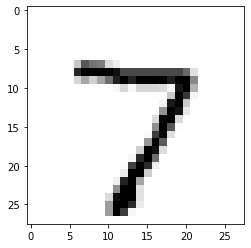

In [ ]:
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap="Greys", interpolation=None)

Первая строка у нас цифра 7, посмотрим что скажет наша нейросеть.
Для этого надо посмотреть индекс самой большой цифры в массиве

In [ ]:
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99)+0.01)

array([[0.022586  ],
       [0.01535547],
       [0.01277039],
       [0.07944582],
       [0.09564299],
       [0.02163553],
       [0.01199012],
       [0.77957111],
       [0.16662314],
       [0.05665533]])

### Проведем полное тестирование

Создадим еще журнал оценок работы сети, чтобы смотреть сколько значений сеть угадала

In [ ]:
scorecard = []

In [ ]:
for record in test_data_list:
    all_values = record.split(',')

    correct_label = int(all_values[0])
    print(correct_label, "истинный маркер")
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "ответ сети")
    print("--------------")
    if (label == correct_label):
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecard.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecard.append(0)

7 истинный маркер
7 ответ сети
--------------
2 истинный маркер
3 ответ сети
--------------
1 истинный маркер
1 ответ сети
--------------
0 истинный маркер
0 ответ сети
--------------
4 истинный маркер
4 ответ сети
--------------
1 истинный маркер
1 ответ сети
--------------
4 истинный маркер
4 ответ сети
--------------
9 истинный маркер
3 ответ сети
--------------
5 истинный маркер
1 ответ сети
--------------
9 истинный маркер
7 ответ сети
--------------


А теперь посмотрим журнал, и посчитаем среднее значение правильных ответов

In [ ]:
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [ ]:
scorecard_array = np.asarray(scorecard)
print ("эффективность = ", scorecard_array.sum() / scorecard_array.size)

эффективность =  0.6


# Добавьте Эпохи к процессу обучения

Эпохи - это многократное повторение тренировочных циклов с одним и тем же набором данных.

Тут всё просто!

        # Переменная epochs указывает, сколько раз тренироваочный набор данных используется в сети.
        epochs = 2
        for e in range(epochs):
            # код с циклом для тренировки

In [ ]:
epochs = 2
for e in range(epochs):
    for record in training_data_list:
      all_values = record.split(',')
      inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
      targets = np.zeros(output_nodes) + 0.01
      targets[int(all_values[0])] = 0.99
      # запустим метод для тренировки
      n.train(inputs, targets)

In [ ]:
data_f = open('/content/mnist_train.csv')
data_l= data_f.readlines()
data_f.close()

In [ ]:
len(data_l)

60000

In [ ]:
data_l[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

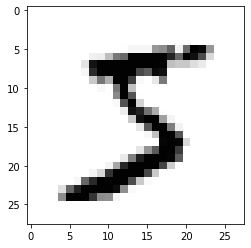

In [ ]:
all_values = data_l[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28))
plt.imshow(image_array, cmap='Greys')

In [ ]:
training_data_f = open("/content/mnist_train.csv")
training_data_l = training_data_f.readlines()
training_data_f.close()

In [ ]:
for record in training_data_l:
    all_values = record.split(',')
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    # запустим метод для тренировки
    n.train(inputs, targets)

In [ ]:
test_data_f = open("/content/mnist_test.csv")
test_data_l = test_data_f.readlines ()
test_data_f.close()

In [ ]:
all_value = test_data_l[0].split(',')
print(all_value[0])

7


In [ ]:
n.query((np.asfarray(all_value[1:]) / 255.0 * 0.99)+0.01)

array([[2.36120134e-03],
       [9.99097116e-04],
       [7.04690603e-03],
       [6.94239268e-03],
       [4.20013465e-04],
       [1.64212214e-02],
       [3.13981299e-03],
       [9.92357506e-01],
       [1.42266118e-03],
       [3.22092015e-03]])

In [ ]:
scorecar = []
for record in test_data_l:
    all_value = record.split(',')

    correct_label = int(all_value[0])
    print(correct_label, "истинный маркер")
    inputs = (np.asfarray(all_value[1:]) / 255.0 * 0.99) + 0.01
    outputs = n.query(inputs)
    label = np.argmax(outputs)
    print(label, "ответ сети")
    print("--------------")
    if (label == correct_label):
        # в случае правильного ответа сети присоединить
        # к списку значение 1
        scorecar.append(1)
    else:
        # в случае неправильного ответа сети присоединить
        # к списку значение 0
        scorecar.append(0)

Выходные данные были обрезаны до нескольких последних строк (5000).
6 ответ сети
--------------
9 истинный маркер
9 ответ сети
--------------
0 истинный маркер
0 ответ сети
--------------
6 истинный маркер
6 ответ сети
--------------
3 истинный маркер
3 ответ сети
--------------
0 истинный маркер
0 ответ сети
--------------
8 истинный маркер
6 ответ сети
--------------
1 истинный маркер
1 ответ сети
--------------
6 истинный маркер
6 ответ сети
--------------
0 истинный маркер
0 ответ сети
--------------
0 истинный маркер
0 ответ сети
--------------
1 истинный маркер
1 ответ сети
--------------
2 истинный маркер
2 ответ сети
--------------
3 истинный маркер
3 ответ сети
--------------
4 истинный маркер
4 ответ сети
--------------
5 истинный маркер
5 ответ сети
--------------
6 истинный маркер
6 ответ сети
--------------
7 истинный маркер
7 ответ сети
--------------
0 истинный маркер
0 ответ сети
--------------
1 истинный маркер
1 ответ сети
--------------
2 истинный маркер
4 ответ сети

In [ ]:
print(scorecar)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [ ]:
scorecar_array = np.asarray(scorecar)
print ("эффективность = ", scorecar_array.sum() / scorecar_array.size)

эффективность =  0.9443
